# Kent Seslerinin Sınıflandırılması

## Bölüm 2: İşlenmiş ve Kaydedilmiş Ses Spektrum Görüntüleriyle CNN Modelinin Eğitilmesi

In [1]:
import os

In [2]:
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/My Drive")

In [5]:
import numpy as np

* Önceki bölümde kaydettiğimiz "imgs.txt" ve "labels.txt" verilerini okuyoruz.

In [7]:
read_imgs=np.loadtxt("imgs.txt")

In [ ]:
read_labels=np.loadtxt("labels.txt")

In [ ]:
read_imgs.shape

(8732, 10000)

In [ ]:
read_labels.shape

(8732,)

* Resimleri text dosyasına kaydedebilmek için np.reshape komutu ile tüm resimleri (100,100) boyutundan (10000,) boyutuna düzlemiştik. Böylece resim dizisini de (8732, 100, 100) boyutundan (8732, 10000) boyutuna getirmiştik. Şimdi ters işlem ile resim dizisini tekrar (8732, 100, 100) boyutuna getirelim.

In [ ]:
new_imgs=read_imgs.reshape(read_imgs.shape[0],int(np.sqrt(read_imgs.shape[1])),int(np.sqrt(read_imgs.shape[1])))
new_imgs.shape

(8732, 100, 100)

In [8]:
imgs=new_imgs
labels=read_labels

In [ ]:
def train_valid_test(imgs, labels, train_percentage = 0.85, valid_percentage = 0.1):
  size=len(imgs)

  X_train=imgs[:int(train_percentage*size)]
  X_val=imgs[int(train_percentage*size):int((train_percentage+valid_percentage)*size)]
  X_test=imgs[int((train_percentage+valid_percentage)*size):]

  y_train=labels[:int(train_percentage*size)]
  y_val=labels[int(train_percentage*size):int((train_percentage+valid_percentage)*size)]
  y_test=labels[int((train_percentage+valid_percentage)*size):]

  return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test= train_valid_test(imgs, labels)

In [ ]:
print("Train Shape:", X_train.shape)
print("Valid Shape:", X_val.shape)
print("Test Shape:", X_test.shape)

Train Shape: (7422, 100, 100)
Valid Shape: (873, 100, 100)
Test Shape: (437, 100, 100)


In [9]:
import matplotlib.pyplot as plt

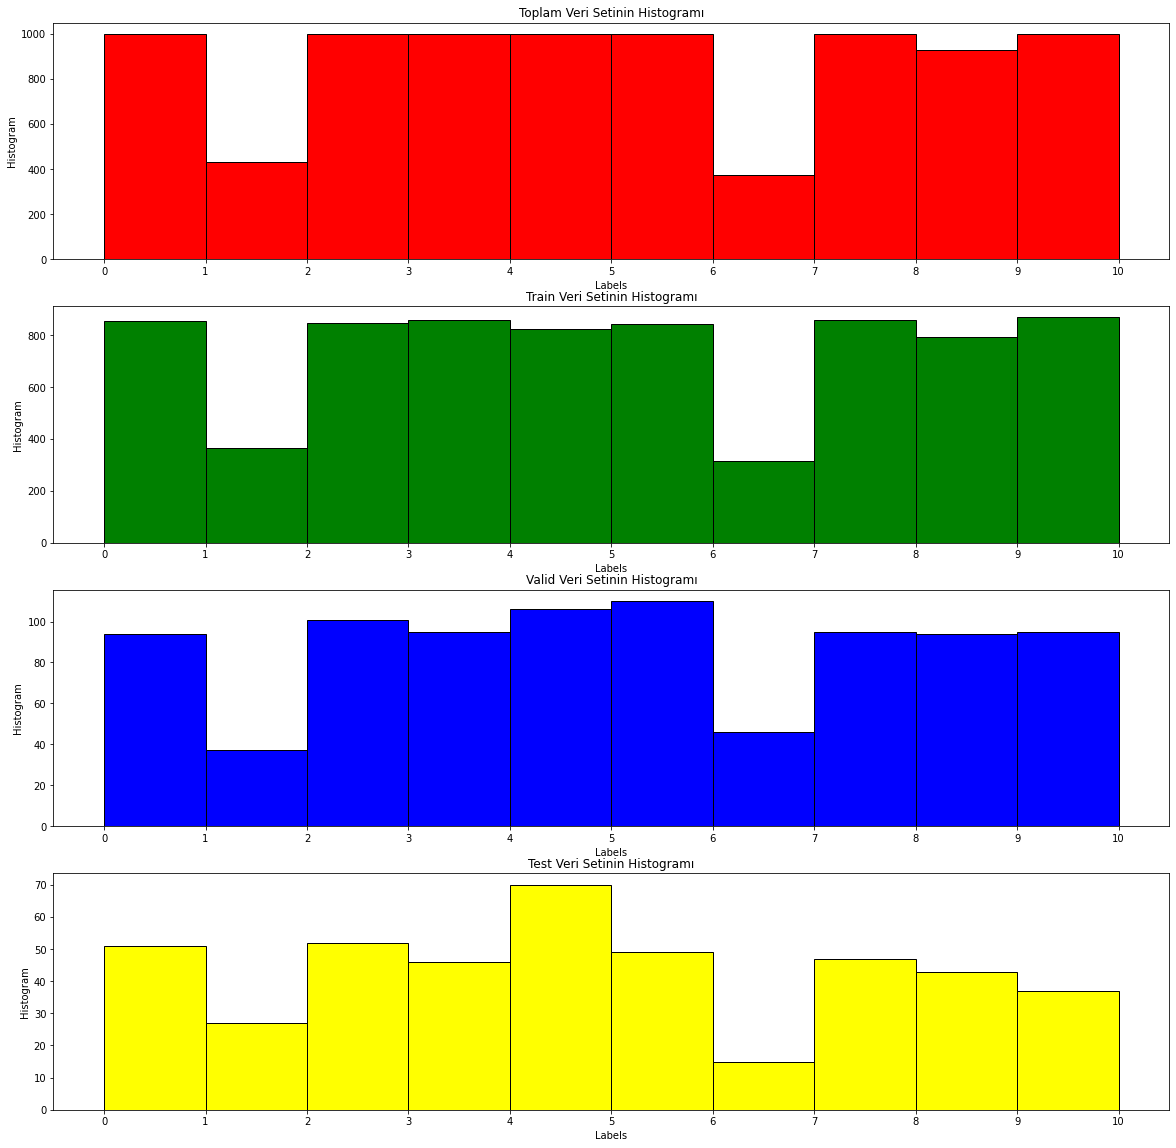

In [ ]:
hist_colors=["red", "green", "blue", "yellow"]
hist_titles=["Toplam", "Train", "Valid", "Test"]
data=[labels, y_train, y_val, y_test]
plt.figure(figsize=(20,20))
for i in range(4):
  plt.subplot(4, 1, i+1)
  plt.title(hist_titles[i]+" Veri Setinin Histogramı")
  plt.hist(data[i], bins=10, color=hist_colors[i], edgecolor="black", range=[0, 10])
  plt.xticks(range(11))
  plt.xlabel("Labels")
  plt.ylabel("Histogram")
plt.show()

## 3. Model Hazırlanması ve Eğitimi - Notebook
a. Bir CNN modeli hazırlayın.

b. Modeli hazırlamış olduğunuz veriyi kullanarak eğitin.

c. Modelin performans metriklerini, loss ve accuracy grafiklerini ekrana yazdırın.

d. Aldığınız sonuçlara göre hyperparameter optimization yapın.

In [11]:
import tensorflow as tf

In [10]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="valid",
                                 activation="relu",
                                 input_shape=(100,100,1))) 
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="valid",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="valid",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.81))
model.add(tf.keras.layers.Dense(2048, activation="relu"))
model.add(tf.keras.layers.Dropout(0.81))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
results=model.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
29/29 [==============================] - 8s 243ms/step - loss: 2.1581 - accuracy: 0.2067 - val_loss: 1.8173 - val_accuracy: 0.3368
Epoch 2/50
29/29 [==============================] - 7s 238ms/step - loss: 1.6596 - accuracy: 0.3791 - val_loss: 1.2794 - val_accuracy: 0.5510
Epoch 3/50
29/29 [==============================] - 7s 242ms/step - loss: 1.2677 - accuracy: 0.5523 - val_loss: 0.9921 - val_accuracy: 0.6701
Epoch 4/50
29/29 [==============================] - 7s 244ms/step - loss: 1.0185 - accuracy: 0.6427 - val_loss: 0.8134 - val_accuracy: 0.7640
Epoch 5/50
29/29 [==============================] - 7s 247ms/step - loss: 0.8483 - accuracy: 0.7165 - val_loss: 0.6684 - val_accuracy: 0.8007
Epoch 6/50
29/29 [==============================] - 7s 248ms/step - loss: 0.7137 - accuracy: 0.7668 - val_loss: 0.5933 - val_accuracy: 0.8339
Epoch 7/50
29/29 [==============================] - 7s 247ms/step - loss: 0.6312 - accuracy: 0.7951 - val_loss: 0.5360 - val_accuracy: 0.8328
Epoch 

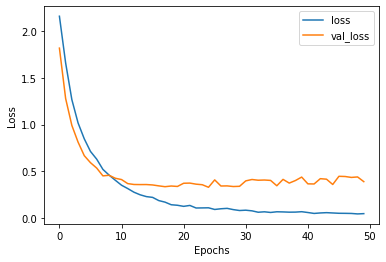

In [ ]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

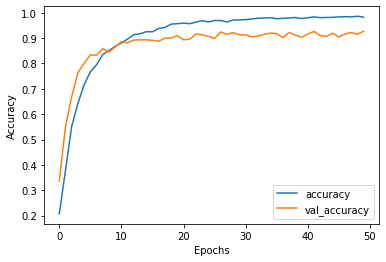

In [ ]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 15ms/step - loss: 0.4356 - accuracy: 0.9039


[0.43560606241226196, 0.9038901329040527]